### for this notebook you need 17flowers dataset

In [59]:
import glob
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import mahotas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import h5py

In [ ]:

# images_path = sorted(glob.glob("../../data/Flowers/*.jpg"))
# images_path=np.char.replace(np.asarray(images_path), '\\', '/')
# images_path


In [61]:

# class_names = [
#     "Daffodil", "Snowdrop", "Lily Valley", "Bluebell", "Crocus", 
#     "Iris", "Tigerlily", "Tulip", "Fritillary", "Sunflower", 
#     "Daisy", "Coltsfoot", "Dandelion", "Cowslip", "Buttercup", 
#     "Windflower", "Pansy"
# ]
# l=0
# i=0
# j=80
# for k in range(1 ,18):
#     os.makedirs('train_data/' + class_names[l])
#     current_path = 'train_data/' + class_names[l] + '/'
#     for index , image_path in enumerate(images_path[i:j] , start=1):
#         original = image_path
#         image_paht = image_path.split('/')
#         image_file_name = str(index) + '.jpg'
#         os.rename(original, current_path + image_file_name)
#     l += 1
#     i += 80
#     j +=80


In [62]:
img = cv2.imread('train_data/Bluebell/1.jpg')
img

array([[[ 99, 104, 107],
        [ 99, 104, 107],
        [ 99, 104, 107],
        ...,
        [ 86,  91,  94],
        [ 86,  91,  94],
        [ 86,  91,  94]],

       [[ 97, 102, 105],
        [ 97, 102, 105],
        [ 97, 102, 105],
        ...,
        [ 86,  91,  94],
        [ 86,  91,  94],
        [ 86,  91,  94]],

       [[ 95, 100, 103],
        [ 95, 100, 103],
        [ 95, 100, 103],
        ...,
        [ 86,  91,  92],
        [ 86,  91,  92],
        [ 86,  91,  92]],

       ...,

       [[178, 112, 123],
        [170, 107, 117],
        [165,  99, 110],
        ...,
        [ 20, 104,  75],
        [ 19, 105,  75],
        [ 19, 105,  75]],

       [[169, 106, 115],
        [163, 100, 109],
        [156,  93, 103],
        ...,
        [ 19, 105,  75],
        [ 19, 105,  75],
        [ 19, 105,  75]],

       [[163, 100, 109],
        [157,  94, 103],
        [150,  87,  97],
        ...,
        [ 19, 105,  75],
        [ 19, 105,  75],
        [ 19, 105,  75]]

In [63]:
image = cv2.resize(img , (500,500))
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([image], [0, 1 ,2], None, [8, 8,8], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist , hist)
image_hist = hist.flatten()

In [64]:
np.shape(image_hist)

(512,)

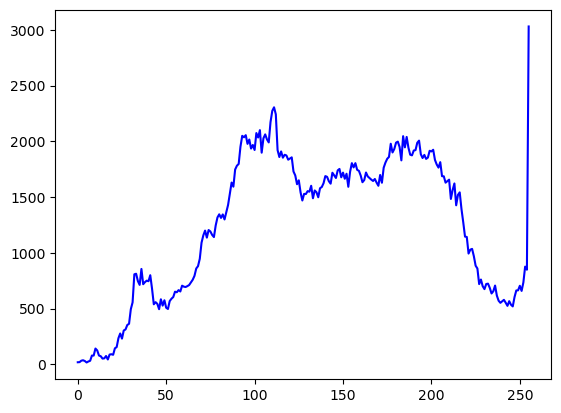

In [65]:

hist = cv2.calcHist([img],[0],None , [256] , [0,256])
plt.plot(hist,color='blue')

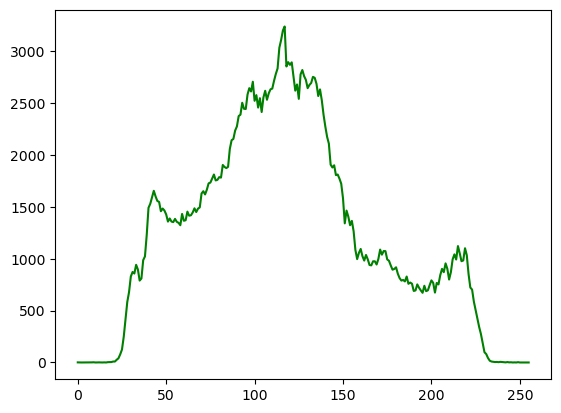

In [66]:

hist = cv2.calcHist([img],[1],None , [256] , [0,256])
plt.plot(hist,color='green')

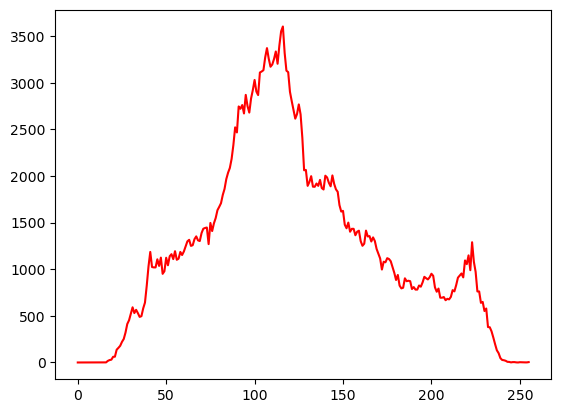

In [67]:
hist = cv2.calcHist([img],[2],None , [256] , [0,256])
plt.plot(hist,color='red')

In [68]:
gray_img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
hue_features = cv2.HuMoments(cv2.moments(gray_img)).flatten()
hue_features

array([1.38546434e-03, 2.20259478e-07, 7.96571382e-12, 1.48445988e-12,
       2.32432093e-24, 4.20314992e-17, 4.54476324e-24])

### Train


In [69]:
class_names = [
    "Daffodil", "Snowdrop", "Lily Valley", "Bluebell", "Crocus", 
    "Iris", "Tigerlily", "Tulip", "Fritillary", "Sunflower", 
    "Daisy", "Coltsfoot", "Dandelion", "Cowslip", "Buttercup", 
    "Windflower", "Pansy"
]

X = []
y= []

for label in class_names:
    dir = os.path.join("train_data", label)
    current_label = label
    # print(f'current Image is {current_label}')
    for i in range(1, 80):
        file = os.path.join(dir, f'{i}.jpg')
        print(f'Current image is {file}')
        image = cv2.imread(file)
        image = cv2.resize(image, (500, 500))
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([image_hsv], [0, 1,2], None, [8, 8 , 8], [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)
        histogram_features = hist.flatten()
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hue_features = cv2.HuMoments(cv2.moments(image_gray)).flatten()
        current_features = np.hstack([histogram_features, hue_features])    
        X.append(current_features)
        y.append(current_label)
        

np.shape(X)

Current image is train_data\Daffodil\1.jpg
Current image is train_data\Daffodil\2.jpg
Current image is train_data\Daffodil\3.jpg
Current image is train_data\Daffodil\4.jpg
Current image is train_data\Daffodil\5.jpg
Current image is train_data\Daffodil\6.jpg
Current image is train_data\Daffodil\7.jpg
Current image is train_data\Daffodil\8.jpg
Current image is train_data\Daffodil\9.jpg
Current image is train_data\Daffodil\10.jpg
Current image is train_data\Daffodil\11.jpg
Current image is train_data\Daffodil\12.jpg
Current image is train_data\Daffodil\13.jpg
Current image is train_data\Daffodil\14.jpg
Current image is train_data\Daffodil\15.jpg
Current image is train_data\Daffodil\16.jpg
Current image is train_data\Daffodil\17.jpg
Current image is train_data\Daffodil\18.jpg
Current image is train_data\Daffodil\19.jpg
Current image is train_data\Daffodil\20.jpg
Current image is train_data\Daffodil\21.jpg
Current image is train_data\Daffodil\22.jpg
Current image is train_data\Daffodil\23.j

(1343, 519)

In [70]:
np.shape(y)

(1343,)

In [71]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([ 5,  5,  5, ..., 11, 11, 11], dtype=int64)

In [72]:
mms = MinMaxScaler()
X = mms.fit_transform(X)
X

array([[2.05929789e-02, 3.00305374e-02, 1.64405492e-01, ...,
        3.86252793e-18, 5.20398301e-02, 1.98735887e-17],
       [1.40452425e-01, 5.46402945e-02, 5.98677081e-02, ...,
        3.86357619e-18, 5.33624281e-02, 1.98700117e-17],
       [3.17104978e-04, 1.50683601e-03, 2.73616926e-02, ...,
        3.86393228e-18, 5.20798604e-02, 1.98687435e-17],
       ...,
       [2.09430997e-01, 2.08217401e-03, 3.67074772e-03, ...,
        3.86393548e-18, 5.19812751e-02, 1.98687334e-17],
       [1.33102378e-03, 4.81236952e-03, 4.55895681e-02, ...,
        3.86393299e-18, 5.20769247e-02, 1.98687427e-17],
       [5.43276278e-05, 5.61210551e-04, 2.49910171e-03, ...,
        3.86392114e-18, 5.20740933e-02, 1.98687385e-17]])

In [73]:
h5_X = h5py.File('train_data/X.h5' , 'w')
h5_X.create_dataset('Features', data=np.array(X))

<HDF5 dataset "Features": shape (1343, 519), type "<f8">

In [74]:

h5_y=h5py.File('train_data/y.h5' , 'w')
h5_y.create_dataset('target', data=np.array(y))

<HDF5 dataset "target": shape (1343,), type "<i8">

In [75]:
h5_X.close()
h5_y.close()

In [76]:
plt.close('all')
import gc
gc.collect()
%reset -f

In [83]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import h5py

In [84]:
X = np.array(h5py.File(os.path.join('train_data' , 'X.h5' ) , 'r')['Features'])
y = np.array(h5py.File(os.path.join('train_data' , 'y.h5' ) , 'r')['target'])

In [85]:
np.shape(y)

(1343,)

In [86]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 100)

In [87]:

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_pred = rf_model.predict(X_test)
print(f'{classification_report(y_pred , y_test)}')

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.75      0.60      0.67        15
           2       0.81      0.65      0.72        20
           3       0.50      0.38      0.43        16
           4       0.56      0.75      0.64        12
           5       0.38      0.45      0.42        11
           6       0.68      0.76      0.72        17
           7       0.60      0.64      0.62        14
           8       0.75      0.88      0.81        17
           9       0.71      1.00      0.83        10
          10       0.56      0.43      0.49        23
          11       0.70      0.41      0.52        17
          12       0.81      0.59      0.68        22
          13       0.82      0.69      0.75        13
          14       0.70      0.84      0.76        19
          15       0.12      0.40      0.19         5
          16       0.59      0.77      0.67        13

    accuracy              